# **| Readers and Books analysis, recommendation and classification system**

csv link: https://zenodo.org/record/4265096#.Y-N2DnbP1jE

In [ ]:
import os
import csv
import time
import urllib.request
import pandas as pd
import ast
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Replace it with your path
DIR_PATH = "/content/gdrive/MyDrive/"

# path of the .csv file
file_path = DIR_PATH + "books_1.Best_Books_Ever.csv"

* Δημιουργία dataframe από το .csv file




In [ ]:
# Set display options
pd.set_option('display.max_columns', None)    # Display all columns
pd.set_option('display.max_colwidth', None)   # Display full column width
pd.set_option('display.max_rows', None)       # Display all rows

# Read .csv file into DataFrame
df = pd.read_csv(file_path)

# Print the first 50 rows of the resulting DataFrame, as an example, to avoid RAM crash
df.head(50)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']","['Katniss Everdeen', 'Peeta Mellark', 'Cato (Hunger Games)', 'Primrose Everdeen', 'Gale Hawthorne', 'Effie Trinket', 'Haymitch Abernathy', 'Cinna', 'President Coriolanus Snow', 'Rue', 'Flavius', 'Lavinia (Hunger Games)', 'Marvel', 'Glimmer', 'Clove', 'Foxface', 'Thresh', 'Greasy Sae', 'Madge Undersee', 'Caesar Flickerman', 'Claudius Templesmith', 'Octavia (Hunger Games)', 'Portia (hunger Games)']",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,"['Locus Award Nominee for Best Young Adult Book (2009)', 'Georgia Peach Book Award (2009)', 'Buxtehuder Bulle (2009)', 'Golden Duck Award for Young Adult (Hal Clement Award) (2009)', ""Grand Prix de l'Imaginaire Nominee for Roman jeunesse étranger (2010)"", 'Books I Loved Best Yearly (BILBY) Awards for Older Readers (2012)', ""West Australian Young Readers' Book Award (WAYRBA) for Older Readers (2010)"", ""Red House Children's Book Award for Older Readers & Overall (2010)"", 'South Carolina Book Award for Junior and Young Adult Book (2011)', 'Charlotte Award (2010)', 'Colorado Blue Spruce Young Adult Book Award (2010)', 'Teen Buckeye Book Award (2009)', ""Pennsylvania Young Readers' Choice Award for Young Adults (2010)"", 'Rhode Island Teen Book Award (2010)', ""Dorothy Canfield Fisher Children's Book Award (2010)"", 'Evergreen Teen Book Award (2011)', 'Soaring Eagle Book Award (2009)', 'Milwaukee County Teen Book Award Nominee (2010)', 'Sakura Medal for Middle School Book (2010)', 'Michigan Library Association Thumbs Up! Award (2009)', 'Florida Teens Read (2009)', 'Deutscher Jugendliteraturpreis for Preis der Jugendjury (2010)', 'Iowa High School Book Award (2011)', 'New Mexico Land of Enchantment Award for Young Adult (2011)', 'Eliot Rosewater Indiana High School Book Award (2010)', 'The Inky Awards for Silver Inky (2009)', 'California Young Readers Medal for Young Adult (2011)', 'Lincoln Award (2011)', 'Kinderboekwinkelprijs (2010)', 'Missouri Truman Readers Award (2011)', 'CYBILS Award for Young Adult Fantasy & Science Fiction (2008)', 'Literaturpreis der Jury der jungen Leser for Jugendbuch (2010)', 'The Inky Awards Shortlist for Silver Inky (2009)', 'Prix Et-lisez-moi (2011)', 'Missouri Gateway Readers Award (2011)', 'Oklahoma Sequoyah Award for High School and Intermediate (2011)', 'Premio El Templo de las Mil Puertas for Mejor novela extranjera perteneciente a saga (2009)', ""Rebecca Caudill Young Readers' Book Award (2011)"", 'LovelyBooks Leserpreis for Fantasy (2009)', 'LovelyBooks Leserpreis for Bestes Cover/Umschlag (2009)', 'Premi Protagonista Jove for Categoria 13-14 anys (2010)']",6376780,"['3444695', '1921313', '745221', '171994', '93557']",96.0,"['District 12, Panem', '

### Question 1: Data preprocessing

* Δημιουργία 5 επιπλέον στηλών στο DataFrame, που περιέχουν χωριστά τις τιμές της στήλης "*ratingsByStars*" για κάθε κατηγορία αστεριών/κριτικής (-> "*ratingStar_1, ratingStar_2, ratingStar_3, ratingStar_4, ratingStar_5*")

In [ ]:
# Split values in "ratingsByStars" column and assign to new columns "ratingStar_i", i=1...5
split_columns = [f'ratingStar_{i+1}' for i in range(5)]
ratings_df = pd.DataFrame(df['ratingsByStars'].str.split(',', expand=True), columns=split_columns)
df1 = df.copy()
df1 = pd.concat([df, ratings_df], axis=1)

# Print the first 50 rows of the resulting DataFrame, as an example, to avoid RAM crash
df1.head(50)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,ratingStar_1,ratingStar_2,ratingStar_3,ratingStar_4,ratingStar_5
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']","['Katniss Everdeen', 'Peeta Mellark', 'Cato (Hunger Games)', 'Primrose Everdeen', 'Gale Hawthorne', 'Effie Trinket', 'Haymitch Abernathy', 'Cinna', 'President Coriolanus Snow', 'Rue', 'Flavius', 'Lavinia (Hunger Games)', 'Marvel', 'Glimmer', 'Clove', 'Foxface', 'Thresh', 'Greasy Sae', 'Madge Undersee', 'Caesar Flickerman', 'Claudius Templesmith', 'Octavia (Hunger Games)', 'Portia (hunger Games)']",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,"['Locus Award Nominee for Best Young Adult Book (2009)', 'Georgia Peach Book Award (2009)', 'Buxtehuder Bulle (2009)', 'Golden Duck Award for Young Adult (Hal Clement Award) (2009)', ""Grand Prix de l'Imaginaire Nominee for Roman jeunesse étranger (2010)"", 'Books I Loved Best Yearly (BILBY) Awards for Older Readers (2012)', ""West Australian Young Readers' Book Award (WAYRBA) for Older Readers (2010)"", ""Red House Children's Book Award for Older Readers & Overall (2010)"", 'South Carolina Book Award for Junior and Young Adult Book (2011)', 'Charlotte Award (2010)', 'Colorado Blue Spruce Young Adult Book Award (2010)', 'Teen Buckeye Book Award (2009)', ""Pennsylvania Young Readers' Choice Award for Young Adults (2010)"", 'Rhode Island Teen Book Award (2010)', ""Dorothy Canfield Fisher Children's Book Award (2010)"", 'Evergreen Teen Book Award (2011)', 'Soaring Eagle Book Award (2009)', 'Milwaukee County Teen Book Award Nominee (2010)', 'Sakura Medal for Middle School Book (2010)', 'Michigan Library Association Thumbs Up! Award (2009)', 'Florida Teens Read (2009)', 'Deutscher Jugendliteraturpreis for Preis der Jugendjury (2010)', 'Iowa High School Book Award (2011)', 'New Mexico Land of Enchantment Award for Young Adult (2011)', 'Eliot Rosewater Indiana High School Book Award (2010)', 'The Inky Awards for Silver Inky (2009)', 'California Young Readers Medal for Young Adult (2011)', 'Lincoln Award (2011)', 'Kinderboekwinkelprijs (2010)', 'Missouri Truman Readers Award (2011)', 'CYBILS Award for Young Adult Fantasy & Science Fiction (2008)', 'Literaturpreis der Jury der jungen Leser for Jugendbuch (2010)', 'The Inky Awards Shortlist for Silver Inky (2009)', 'Prix Et-lisez-moi (2011)', 'Missouri Gateway Readers Award (2011)', 'Oklahoma Sequoyah Award for High School and Intermediate (2011)', 'Premio El Templo de las Mil Puertas for Mejor novela extranjera perteneciente a saga (2009)', ""Rebecca Caudill Young Readers' Book Award (2011)"", 'LovelyBooks Leserpreis for Fantasy (2009)', 'LovelyBooks Leserpreis for Bestes Cover/Umschlag (2009)', 'Premi Protagonista Jove for Categoria 13-14 anys (2010)']",6376780,"['3444695', '19213

* Δημιουργία 1 επιπλέον στήλης "*genreSingle*" όπου αποθηκεύουμε το πρώτο genre value της αρχικής "*genre*" στήλης.

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df2 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df2.dropna(subset=['genres'], inplace=True)

# Extract the first element from the "genres" column and save it into a new column "genreSingle"
df2['genreSingle'] = df2['genres'].str.split(',').str[0].str.strip().str.replace(r'\[', '', regex=True)

# Print the first 50 rows of the resulting DataFrame, as an example, to avoid RAM crash
df2.head(50)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,genreSingle
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']","['Katniss Everdeen', 'Peeta Mellark', 'Cato (Hunger Games)', 'Primrose Everdeen', 'Gale Hawthorne', 'Effie Trinket', 'Haymitch Abernathy', 'Cinna', 'President Coriolanus Snow', 'Rue', 'Flavius', 'Lavinia (Hunger Games)', 'Marvel', 'Glimmer', 'Clove', 'Foxface', 'Thresh', 'Greasy Sae', 'Madge Undersee', 'Caesar Flickerman', 'Claudius Templesmith', 'Octavia (Hunger Games)', 'Portia (hunger Games)']",Hardcover,First Edition,374,Scholastic Press,09/14/08,NaN,"['Locus Award Nominee for Best Young Adult Book (2009)', 'Georgia Peach Book Award (2009)', 'Buxtehuder Bulle (2009)', 'Golden Duck Award for Young Adult (Hal Clement Award) (2009)', ""Grand Prix de l'Imaginaire Nominee for Roman jeunesse étranger (2010)"", 'Books I Loved Best Yearly (BILBY) Awards for Older Readers (2012)', ""West Australian Young Readers' Book Award (WAYRBA) for Older Readers (2010)"", ""Red House Children's Book Award for Older Readers & Overall (2010)"", 'South Carolina Book Award for Junior and Young Adult Book (2011)', 'Charlotte Award (2010)', 'Colorado Blue Spruce Young Adult Book Award (2010)', 'Teen Buckeye Book Award (2009)', ""Pennsylvania Young Readers' Choice Award for Young Adults (2010)"", 'Rhode Island Teen Book Award (2010)', ""Dorothy Canfield Fisher Children's Book Award (2010)"", 'Evergreen Teen Book Award (2011)', 'Soaring Eagle Book Award (2009)', 'Milwaukee County Teen Book Award Nominee (2010)', 'Sakura Medal for Middle School Book (2010)', 'Michigan Library Association Thumbs Up! Award (2009)', 'Florida Teens Read (2009)', 'Deutscher Jugendliteraturpreis for Preis der Jugendjury (2010)', 'Iowa High School Book Award (2011)', 'New Mexico Land of Enchantment Award for Young Adult (2011)', 'Eliot Rosewater Indiana High School Book Award (2010)', 'The Inky Awards for Silver Inky (2009)', 'California Young Readers Medal for Young Adult (2011)', 'Lincoln Award (2011)', 'Kinderboekwinkelprijs (2010)', 'Missouri Truman Readers Award (2011)', 'CYBILS Award for Young Adult Fantasy & Science Fiction (2008)', 'Literaturpreis der Jury der jungen Leser for Jugendbuch (2010)', 'The Inky Awards Shortlist for Silver Inky (2009)', 'Prix Et-lisez-moi (2011)', 'Missouri Gateway Readers Award (2011)', 'Oklahoma Sequoyah Award for High School and Intermediate (2011)', 'Premio El Templo de las Mil Puertas for Mejor novela extranjera perteneciente a saga (2009)', ""Rebecca Caudill Young Readers' Book Award (2011)"", 'LovelyBooks Leserpreis for Fantasy (2009)', 'LovelyBooks Leserpreis for Bestes Cover/Umschlag (2009)', 'Premi Protagonista Jove for Categoria 13-14 anys (2010)']",6376780,"['3444695', '1921313', '745221', '171994', '93557']",96.0,"['District 1

* Δημιουργία 1 επιπλέον στήλης "*genreSingle*" όπου αποθηκεύουμε το πρώτο genre value της αρχικής "*genre*" στήλης.

In [ ]:
import warnings
import pandas as pd

df3 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df3 = df3.dropna(subset=['publishDate'])

# Convert "publishDate" column to datetime format
df3['publishDate'] = pd.to_datetime(df3['publishDate'], errors='coerce')

# Extract the year from "publishDate" and save it in "PublishYear" column
df3.loc[:, 'PublishYear'] = df3['publishDate'].dt.year

# Print the first 50 rows of the resulting DataFrame, as an example, to avoid RAM crash
df3.head(50)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,bookFormat,edition,pages,publisher,publishDate,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price,PublishYear
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love.",English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']","['Katniss Everdeen', 'Peeta Mellark', 'Cato (Hunger Games)', 'Primrose Everdeen', 'Gale Hawthorne', 'Effie Trinket', 'Haymitch Abernathy', 'Cinna', 'President Coriolanus Snow', 'Rue', 'Flavius', 'Lavinia (Hunger Games)', 'Marvel', 'Glimmer', 'Clove', 'Foxface', 'Thresh', 'Greasy Sae', 'Madge Undersee', 'Caesar Flickerman', 'Claudius Templesmith', 'Octavia (Hunger Games)', 'Portia (hunger Games)']",Hardcover,First Edition,374,Scholastic Press,2008-09-14,NaN,"['Locus Award Nominee for Best Young Adult Book (2009)', 'Georgia Peach Book Award (2009)', 'Buxtehuder Bulle (2009)', 'Golden Duck Award for Young Adult (Hal Clement Award) (2009)', ""Grand Prix de l'Imaginaire Nominee for Roman jeunesse étranger (2010)"", 'Books I Loved Best Yearly (BILBY) Awards for Older Readers (2012)', ""West Australian Young Readers' Book Award (WAYRBA) for Older Readers (2010)"", ""Red House Children's Book Award for Older Readers & Overall (2010)"", 'South Carolina Book Award for Junior and Young Adult Book (2011)', 'Charlotte Award (2010)', 'Colorado Blue Spruce Young Adult Book Award (2010)', 'Teen Buckeye Book Award (2009)', ""Pennsylvania Young Readers' Choice Award for Young Adults (2010)"", 'Rhode Island Teen Book Award (2010)', ""Dorothy Canfield Fisher Children's Book Award (2010)"", 'Evergreen Teen Book Award (2011)', 'Soaring Eagle Book Award (2009)', 'Milwaukee County Teen Book Award Nominee (2010)', 'Sakura Medal for Middle School Book (2010)', 'Michigan Library Association Thumbs Up! Award (2009)', 'Florida Teens Read (2009)', 'Deutscher Jugendliteraturpreis for Preis der Jugendjury (2010)', 'Iowa High School Book Award (2011)', 'New Mexico Land of Enchantment Award for Young Adult (2011)', 'Eliot Rosewater Indiana High School Book Award (2010)', 'The Inky Awards for Silver Inky (2009)', 'California Young Readers Medal for Young Adult (2011)', 'Lincoln Award (2011)', 'Kinderboekwinkelprijs (2010)', 'Missouri Truman Readers Award (2011)', 'CYBILS Award for Young Adult Fantasy & Science Fiction (2008)', 'Literaturpreis der Jury der jungen Leser for Jugendbuch (2010)', 'The Inky Awards Shortlist for Silver Inky (2009)', 'Prix Et-lisez-moi (2011)', 'Missouri Gateway Readers Award (2011)', 'Oklahoma Sequoyah Award for High School and Intermediate (2011)', 'Premio El Templo de las Mil Puertas for Mejor novela extranjera perteneciente a saga (2009)', ""Rebecca Caudill Young Readers' Book Award (2011)"", 'LovelyBooks Leserpreis for Fantasy (2009)', 'LovelyBooks Leserpreis for Bestes Cover/Umschlag (2009)', 'Premi Protagonista Jove for Categoria 13-14 anys (2010)']",6376780,"['3444695', '1921313', '745221', '171994', '93557']",96.0,"['District

### Question 2: Extracting data quering the DataFrame

Πριν την επεξεργασία δεδομένων σε κάθε υποερώτημα, δημιουργούμε ένα νέο copy του αρχικού dataframe και σε αυτό το copy κάνουμε drop τα rows για τα οποία στις αντίστοιχες στήλες που επεξεργαζόμαστε υπάρχουν NaN values. Διαφορετικά, αν κάνουμε drop αδιακρίτως τα rows για τα οποία σε κάποια στήλη τους ή στη στήλη που επεξεργαζόμαστε, υπάρχουν NaN values, τότε προκύπτει το εξής πρόβλημα:
Όταν ξαναχρησιμοποιήσουμε το ίδιο αλλαγμένο dataframe σε επόμενο ερώτημα, είναι πιθανό να έχουμε απώλεια δεδομένων rows από πριν, παρ'όλο που στο νέο ερώτημά μας, η στήλη επεξεργασίας ΔΕΝ θα είχε NaN value!!

2.   Find the 10 books with the most pages
     (Ποια είναι τα 10 βιβλία με τις περισσότερες σελίδες).

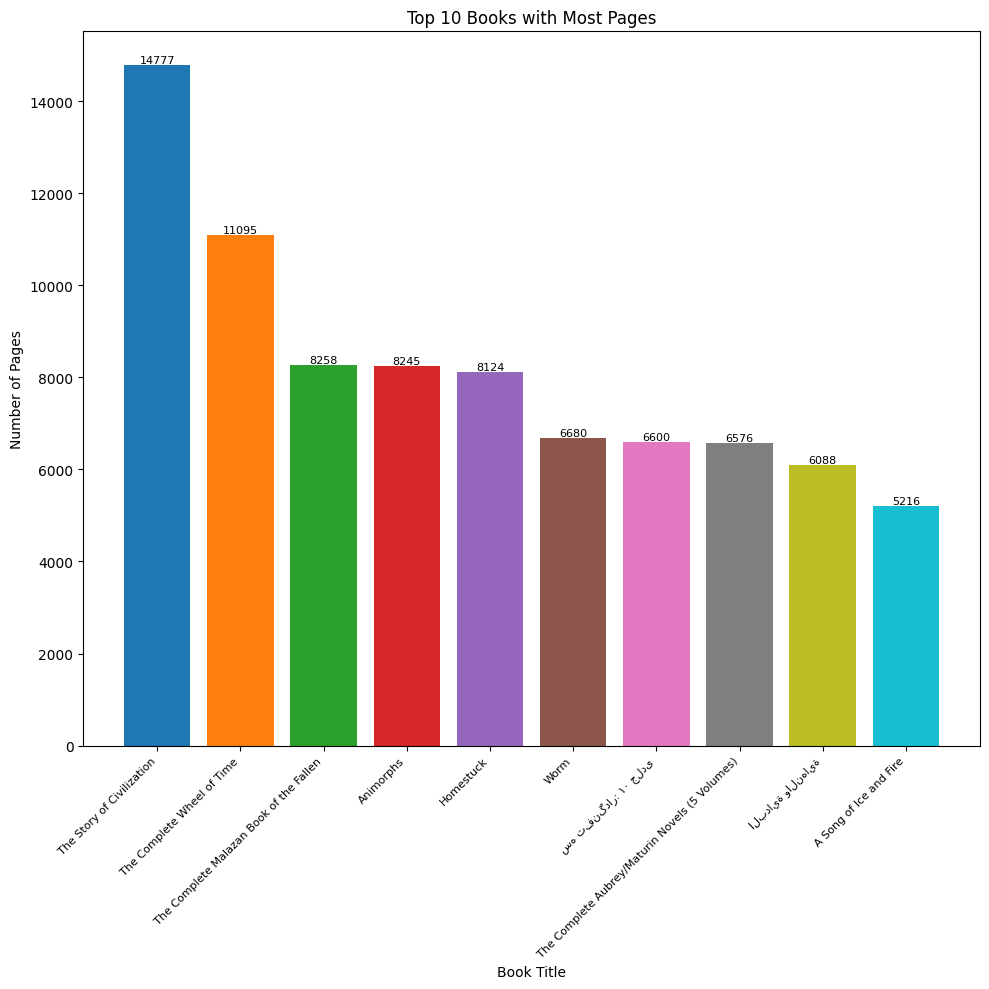

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df_2_2 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df_2_2.dropna(subset=['title', 'pages'], inplace=True)

# Convert 'pages' column to numeric dtype
df_2_2['pages'] = pd.to_numeric(df_2_2['pages'], errors='coerce')

# Sort the dataframe by 'pages' column in descending order and select the top 10
top_10_books = df_2_2.sort_values('pages', ascending=False).head(10)

# Generate a color palette with a unique color for each book title
colors = plt.cm.tab10(np.arange(len(top_10_books)))

# Plot the histogram with colored bars
plt.figure(figsize=(10, 10))
plt.bar(top_10_books['title'], top_10_books['pages'], color=colors)

# Customize the plot
plt.title('Top 10 Books with Most Pages')
plt.xlabel('Book Title')
plt.ylabel('Number of Pages')
plt.xticks(rotation=45, ha='right', fontsize=8)     # Rotate and align x-axis labels
plt.ticklabel_format(style='plain', axis='y')       # Display y-axis values in plain format

# Add total number of pages above each bar
for i, pages in enumerate(top_10_books['pages']):
    plt.text(i, pages, int(pages), ha='center', va='bottom', fontsize=8)

# Plotting
plt.tight_layout()
plt.show()



5.   Find the 10 writers with the most books in their writing history
     (Ποιοι είναι οι 10 συγγραφεις με τα περισσότερα βιβλία).



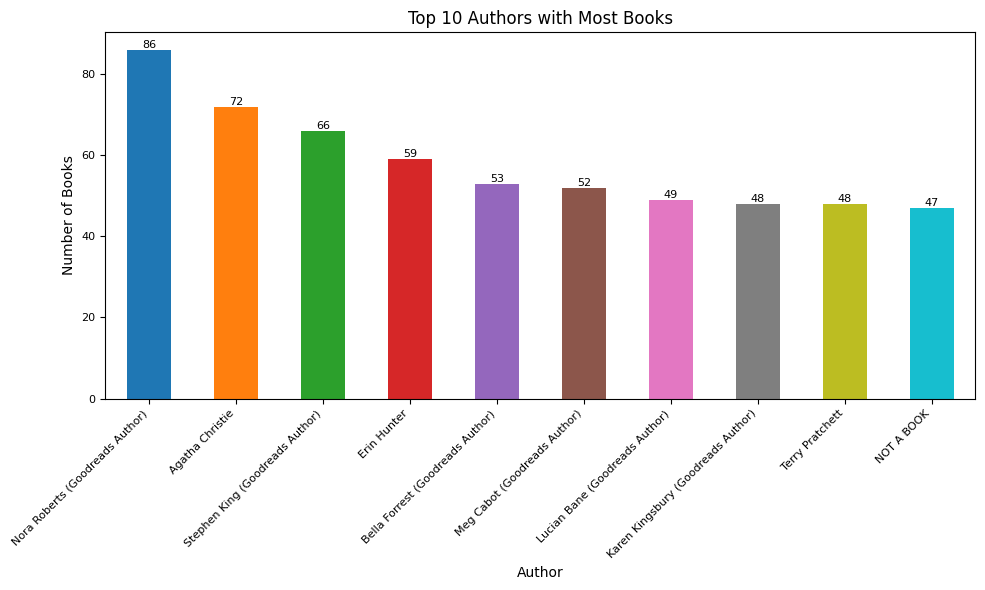

In [ ]:
df_2_5 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df_2_5.dropna(subset=['title', 'author'], inplace=True)

# Group the dataframe by writer and count the number of books
writer_counts = df_2_5['author'].value_counts().nlargest(10)

# Generate a color palette with a unique color for each author
colors = plt.cm.tab10(np.arange(len(writer_counts)))

# Plot the histogram with colored bars
plt.figure(figsize=(10, 6))
writer_counts.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate and align x-axis labels
plt.yticks(fontsize=8)                           # Adjust y-axis tick font size

# Add total book count above each bar for better visualisation
for i, count in enumerate(writer_counts):
    plt.text(i, count, count, ha='center', va='bottom', fontsize=8)

# Plotting
plt.tight_layout()
plt.show()

6.   Find the 10 writers with the most critics in their writing history
     (Ποιοι είναι οι 10 συγγραφεις με τις περισσότερες κριτικές για τα βιβλία τους).

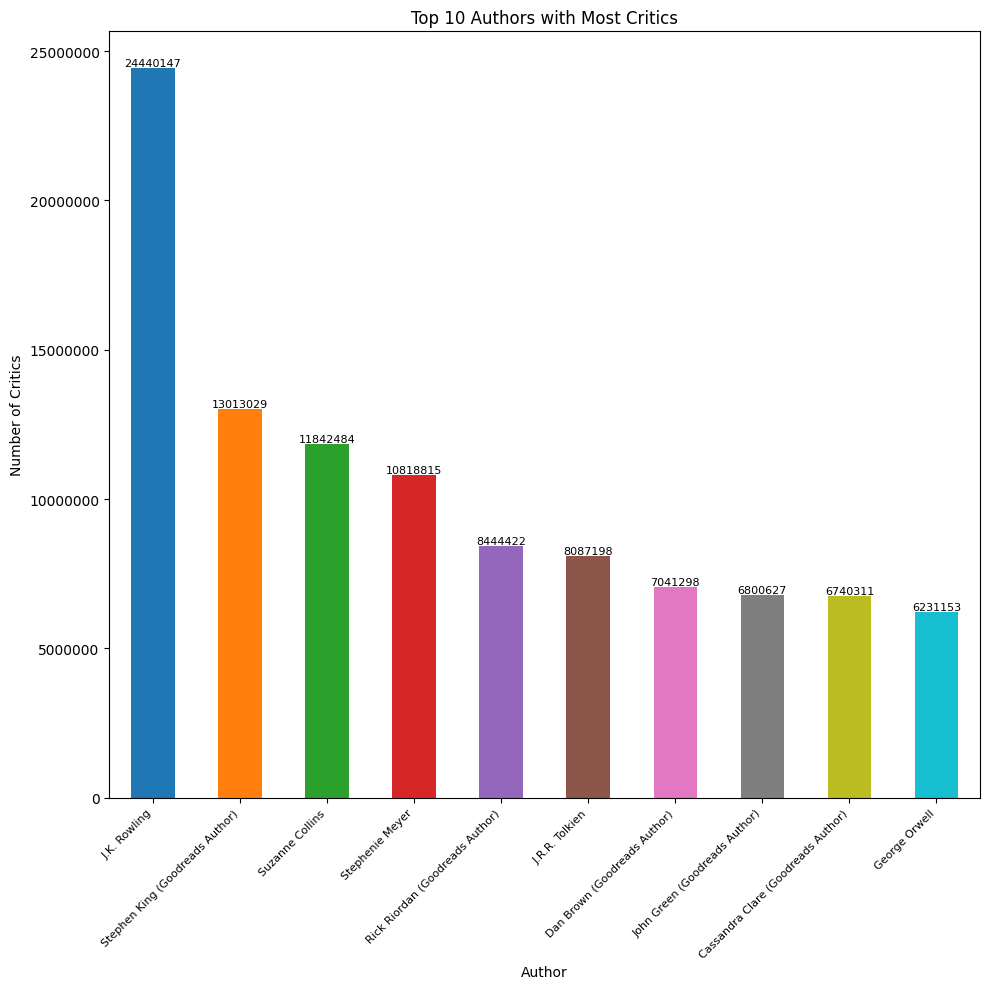

In [ ]:
df_2_6 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df_2_6.dropna(subset=['author', 'numRatings'], inplace=True)

# Create a copy of the DataFrame
df_copy = df_2_6.copy()

# Split the author column by comma and extract the first part
# We want only the name of the author, we must ignore the names of the editor, illustrator, etc. if any
df_copy['author_name'] = df_copy['author'].str.split(',').str[0]

# Group the dataframe by first name and sum the critics
writer_total_critics = df_copy.groupby('author_name')['numRatings'].sum().nlargest(10)

# Generate a color palette with a unique color for each author
colors = plt.cm.tab10(np.arange(len(writer_total_critics)))

# Plot the histogram with colored bars
plt.figure(figsize=(10, 10))
writer_total_critics.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Top 10 Authors with Most Critics')
plt.xlabel('Author')
plt.ylabel('Number of Critics')
plt.xticks(rotation=45, ha='right', fontsize=8)     # Rotate and align x-axis labels
plt.ticklabel_format(style='plain', axis='y')       # Display y-axis values in plain format

# Add total number of critics on top of each bar
for i, count in enumerate(writer_total_critics):
    plt.text(i, count, count, ha='center', va='bottom', fontsize=8)

# Plotting
plt.tight_layout()
plt.show()

# Delete the df copy, we used it only for data mining and plotting
del df_copy

8.   Find the languages mostly used in the books
     (Ποιες είναι οι πιο συχνές γλώσσες συγγραφής των βιβλίων + φθίνουσα κατάταξη αυτών).

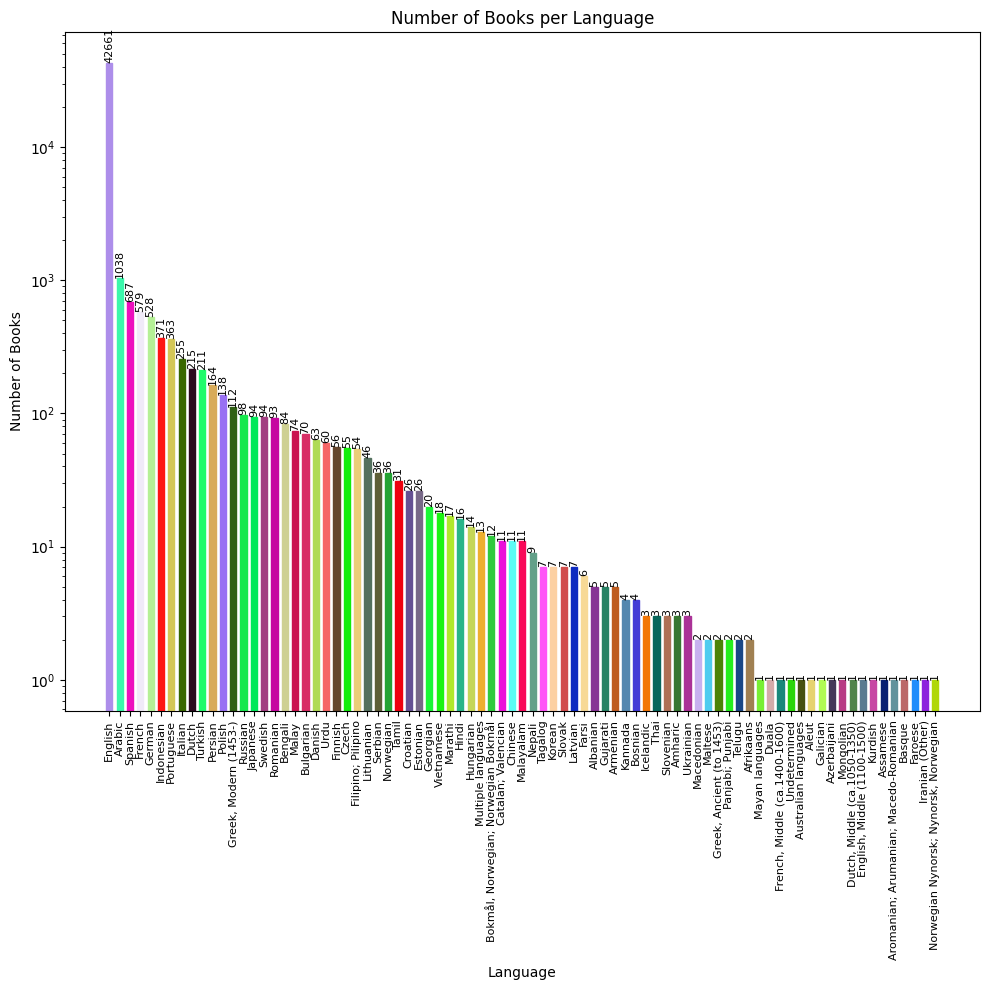

In [ ]:
import random

df_2_8 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df_2_8.dropna(subset=['title', 'language'], inplace=True)

# Count the number of books for each language
language_counts = df_2_8['language'].value_counts()

# Get the unique languages and their corresponding counts
languages = language_counts.index
counts = language_counts.values

# Generate random colors with number equal to the number of languages existing in the dataframe
random_colors = ['#%06x' % random.randint(0, 0xFFFFFF) for _ in range(len(languages))]

# Plot the color plot with different colors for each bar, to better visualise data
plt.figure(figsize=(10, 10))

# Adjust the width of the bars dynamically based on the number of languages and add padding on both sides
bar_width = 1 / (len(languages) + 2)

bars = plt.bar(range(len(languages)), counts, width=0.6)

# Assign different colors to each bar
for i, bar in enumerate(bars):
    bar.set_color(random_colors[i])

# Set y-axis scale to logarithmic for better visualization of small and very large numbers
plt.yscale('log')  

# Customize the plot
plt.title('Number of Books per Language')
plt.xlabel('Language')
plt.ylabel('Number of Books')

# Rotate and align x-axis labels
plt.xticks(range(len(languages)), languages, rotation=90, ha='center', fontsize=8)  

# Add the count above each bar
for i, count in enumerate(counts):
    plt.text(i, count, count, ha='center', va='bottom', fontsize=8, rotation=90)

# Plotting
plt.tight_layout()
plt.show()

9.   Find the 10 publishers with the most publications
     (Ποιοι είναι οι 10 εκδότες με τις περισσότερες εκδόσεις βιβλίων).

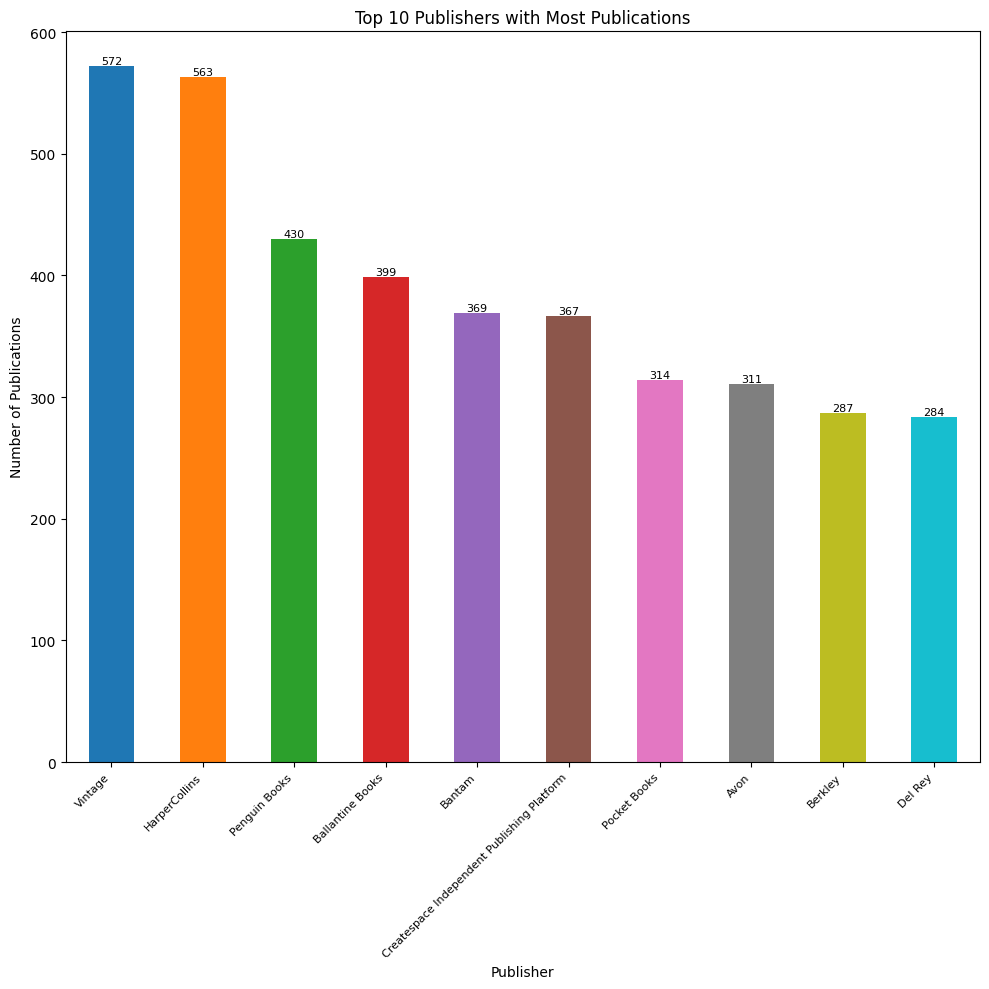

In [ ]:
df_2_9 = df.copy()

# Remove rows with NaN values in the columns that we are going to process in the sub-question
df_2_9.dropna(subset=['publisher'], inplace=True)

# Group the dataframe by publisher and count the publications
publisher_publications = df_2_9['publisher'].value_counts().nlargest(10)

# Generate a color palette with a unique color for each publisher
colors = plt.cm.tab10(np.arange(len(publisher_publications)))

# Plot the histogram with colored bars
plt.figure(figsize=(10, 10))
publisher_publications.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Top 10 Publishers with Most Publications')
plt.xlabel('Publisher')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right', fontsize=8)     # Rotate and align x-axis labels
plt.ticklabel_format(style='plain', axis='y')       # Display y-axis values in plain format

# Add the number of publications on top of each bar
for i, count in enumerate(publisher_publications):
    plt.text(i, count, count, ha='center', va='bottom', fontsize=8)

# Plotting
plt.tight_layout()
plt.show()

# free memory
del df_2_2, df_2_5, df_2_6, df_2_8, df_2_9

### Question 3: Recommendation System (RS)

In [ ]:
import random # import again for code execution independence

# Creating the new DataFrame df_RS, by keeping only the 'bookId' 
# and 'description' columns as well as the rows where 'language'="English"

df_RS_all = df.loc[df['language'] == 'English', ['bookId', 'description']]

# Print the first 50 rows of the resulting DataFrame, as an example, to avoid RAM crash
df_RS_all.head(50)

,bookId,description
0,2767052-the-hunger-games,"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love."
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,"There is a door at the end of a silent corridor. And it’s haunting Harry Pottter’s dreams. Why else would he be waking in the middle of the night, screaming in terror?Harry has a lot on his mind for this, his fifth year at Hogwarts: a Defense Against the Dark Arts teacher with a personality like poisoned honey; a big surprise on the Gryffindor Quidditch team; and the looming terror of the Ordinary Wizarding Level exams. But all these things pale next to the growing threat of He-Who-Must-Not-Be-Named - a threat that neither the magical government nor the authorities at Hogwarts can stop.As the grasp of darkness tightens, Harry must discover the true depth and strength of his friends, the importance of boundless loyalty, and the shocking price of unbearable sacrifice.His fate depends on them all."
2,2657.To_Kill_a_Mockingbird,"The unforgettable novel of a childhood in a sleepy Southern town and the crisis of conscience that rocked it, To Kill A Mockingbird became both an instant bestseller and a critical success when it was first published in 1960. It went on to win the Pulitzer Prize in 1961 and was later made into an Academy Award-winning film, also a classic.Compassionate, dramatic, and deeply moving, To Kill A Mockingbird takes readers to the roots of human behavior - to innocence and experience, kindness and cruelty, love and hatred, humor and pathos. Now with over 18 million copies in print and translated into forty languages, this regional story by a young Alabama woman claims universal appeal. Harper Lee always considered her book to be a simple love story. Today it is regarded as a masterpiece of American literature."
3,1885.Pride_and_Prejudice,"Alternate cover edition of ISBN 9780679783268Since its immediate success in 1813, Pride and Prejudice has remained one of the most popular novels in the English language. Jane Austen called this brilliant work ""her own darling child"" and its vivacious heroine, Elizabeth Bennet, ""as delightful a creature as ever appeared in print."" The romantic clash between the opinionated Elizabeth and her proud beau, Mr. Darcy, is a splendid performance of civilized sparring. And Jane Austen's radiant wit sparkles as her characters dance a delicate quadrille of flirtation and intrigue, making this book the most superb comedy of manners of Regency England."
4,41865.Twilight,"About three things I was absolutely positive.\n\nFirst, Edward was a vampire.\n\nSecond, there was a part of him—and I didn't know how dominant that part might be—that thirsted for my blood.\n\nAnd third, I was unconditionally and irrevocably in love with him.\n\nDeeply seductive and extraordinarily suspenseful, Twilight is a love story with bite."
5,19063.The_Book_Thief,"Librarian's note: An alternate cover edition can be found hereIt is 1939. Nazi Germany. The country is holding its breath. Death has never been busier, and will be busier still.By her brother's graveside, Liesel's life is changed when she picks up a single object, partially hidden in the snow. It is The Gravedigger's Handbook, left 

O TF-IDF matrix (Term Frequency-Inverse Document Frequency) αποτελεί μια μαθηματική/αριθμητική απεικόνιση κειμένου (text) και αναπαριστά πληροφορία σχετικά με την σπανιότητα εμφάνισης λέξεων και δομών μέσα στην ευρύτερη δομή του κειμένου.

* Term Frequency (TF): Μετρά τη συυχνότητα εμφάνισης ενός όρου (π.χ. λέξεων) μέσα στο κείμενο. Όταν το TF ενός όρου είναι μεγάλο, αυτό σημαίνει ότι τόσο πιο συχνά εμφανίζεται αυτός ο όρος μέσα στο κείμενο.

* Inverse Document Frequency (IDF): Είναι το μέτρο σπανιότητας ενός όρου, όχι σε ένα μοναδικό κείμενο, αλλά σε μια ομάδα/συλλογή κειμένων (π.χ. 100 βιβλία μιας βιβλιοθήκης). Όσο πιο μεγάλη είναι η τιμή IDF ενός όρου, τόσο πιο σπάνια συναντάται μέσα στη συλλογή των κειμένων, οπότε αποκτά μεγαλύτερη βαρύτητα σε διάφορες διαδικασίες εξόρυξης δεδομένων, αφού συναντάται "σπάνια" και κάθε εύρεσή του έχει μεγαλύτερη "σημασία".

Η τιμή TF-IDF score κάθε όρου ισούται με το γινόμενο των 2 προηγούμενων τιμών (TF*IDF). O TF-IDF matrix αποτελείται από rows που αντιστοιχούν στα διάφορα κείμενα/documents και κάθε column σε κάθε διαφορετικό όρο που εμφανίζεται μέσα στη συλλογή (σε κάποια ή όλα τα documents) κειμένων.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Remove rows with NaN values in the 'description' column
df_RS_all.dropna(subset=['description'], inplace=True)

# Reduce the dataset to avoid RAM crash
df_RS = df_RS_all.head(15000)

# Extract the 'description' column from the DataFrame
descriptions = df_RS['description'].tolist()

# UNIGRAMS -> Create an instance of TfidfVectorizer with ngram_range=(1, 1) and default stop words for the English language
vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tfidf_matrix_unigrams = vectorizer.fit_transform(descriptions)

# BIGRAMS -> Create an instance of TfidfVectorizer with ngram_range=(2, 2) and default stop words for the English language
vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english')
tfidf_matrix_bigrams = vectorizer.fit_transform(descriptions)

* UNIGRAMS 100 most similar books

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

titles = df['title'].tolist()   # we want this to print the 'title' of the book

# Calculate cosine similarity on the UNIGRAMS TF-IDF matrix
cosine_sim_unigrams = cosine_similarity(tfidf_matrix_unigrams, tfidf_matrix_unigrams)

print("> UNIGRAMS: 100 most similar books")
print("------------------------------------\n")

# Get the indices of the top 100 books after sorting in descending order
similar_books_indices_unigrams = np.argsort(-cosine_sim_unigrams)[:,:101]

# Get the indices of the top 100 similar books excluding the self-similar ones (diagonal)
similar_books_indices_unigrams = similar_books_indices_unigrams[:, 1:]

# Flatten the indices array to process them next
similar_books_indices_unigrams = similar_books_indices_unigrams.flatten()

# Get unique indices and keep only the first 100 indices
similar_books_indices_unigrams = np.unique(similar_books_indices_unigrams)[:100]

# Create a dictionary to store the most similar books
similar_books_uni_dict = {}

# Print the most similar books using unigrams
for book_index in similar_books_indices_unigrams:
    similar_books_uni_dict[book_index] = titles[book_index]
    print(titles[book_index])

> UNIGRAMS: 100 most similar books
------------------------------------

The Hunger Games
Harry Potter and the Order of the Phoenix
To Kill a Mockingbird
Pride and Prejudice
Twilight
The Book Thief
Animal Farm
The Chronicles of Narnia
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings
Gone with the Wind
The Fault in Our Stars
The Hitchhiker's Guide to the Galaxy
The Giving Tree
Wuthering Heights
The Da Vinci Code
Memoirs of a Geisha
The Picture of Dorian Gray
Alice's Adventures in Wonderland & Through the Looking-Glass
Jane Eyre
Les Misérables
Fahrenheit 451
Divergent
Lord of the Flies
Romeo and Juliet
The Alchemist
Crime and Punishment
The Perks of Being a Wallflower
The Great Gatsby
City of Bones
Ender's Game
The Help
Anne of Green Gables
Harry Potter and the Sorcerer's Stone
The Little Prince
Charlotte's Web
Of Mice and Men
The Time Traveler's Wife
Dracula
Brave New World
One Hundred Years of Solitude
The Catcher in the Rye
The Princess Bride
The Lightning Thief
T

* BIGRAMS 100 most similar books

In [ ]:
# Calculate cosine similarity on the BIGRAMS TF-IDF matrix
cosine_sim_bigrams = cosine_similarity(tfidf_matrix_bigrams, tfidf_matrix_bigrams)

print("> BIGRAMS: 100 most similar books")
print("------------------------------------\n")

# Get the indices of the top 100 books after sorting in descending order
similar_books_indices_bigrams = np.argsort(-cosine_sim_bigrams)[:,:101]

# Get the indices of the top 100 similar books excluding the self-similar ones (diagonal)
similar_books_indices_bigrams = similar_books_indices_bigrams[:, 1:]

# Flatten the indices array to process them next
similar_books_indices_bigrams = similar_books_indices_bigrams.flatten()

# Get unique indices and keep only the first 100 indices
similar_books_indices_bigrams = np.unique(similar_books_indices_bigrams)[:100]

# Create a dictionary to store the most similar books
similar_books_bi_dict = {}

# Print the most similar books using unigrams
for book_index in similar_books_indices_bigrams:
    similar_books_bi_dict[book_index] = titles[book_index]
    print(titles[book_index])

> BIGRAMS: 100 most similar books
------------------------------------

The Hunger Games
Harry Potter and the Order of the Phoenix
To Kill a Mockingbird
Pride and Prejudice
Twilight
The Book Thief
Animal Farm
The Chronicles of Narnia
J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings
Gone with the Wind
The Fault in Our Stars
The Hitchhiker's Guide to the Galaxy
The Giving Tree
Wuthering Heights
The Da Vinci Code
Memoirs of a Geisha
The Picture of Dorian Gray
Alice's Adventures in Wonderland & Through the Looking-Glass
Jane Eyre
Les Misérables
Fahrenheit 451
Divergent
Lord of the Flies
Romeo and Juliet
The Alchemist
Crime and Punishment
The Perks of Being a Wallflower
The Great Gatsby
City of Bones
Ender's Game
The Help
Anne of Green Gables
Harry Potter and the Sorcerer's Stone
The Little Prince
Charlotte's Web
Of Mice and Men
The Time Traveler's Wife
Dracula
Brave New World
One Hundred Years of Solitude
The Catcher in the Rye
The Princess Bride
The Lightning Thief
Th

Τα unigrams και bigrams είναι tokenisation levels γλώσσας κειμένου, μέσω των οποίων μπορούν να εξαχθούν συμπεράσματα, όπως για παράδειγμα ο συσχετισμός γλωσσικών εννοιών ή η αναγνώριση λεκτικών μοτίβων.
Τα unigrams είναι η υποδιαίρεση του κειμένου σε αυτοτελή tokens (λέξεις). Για παράδειγμα, η πρόταση "Ένας κομήτης έπεσε στη Γη" αποτελείται από 5 unigrams: "Ένας", "κομήτης", "έπεσε", "στη", "Γη".
Τα bigrams είναι υποδιαίρεση ενός κειμένου σε tokens που αποτελούνται από ζευγάρια συνεχόμενων λέξεων. Στο προηγούμενο παράδειγμα, τα bigrams θα ήταν 4: "Ένας κομήτης", "κομήτης έπεσε", "έπεσε στη", "στη Γη". 

* Συναρτήσεις υπολογισμού των Ν πιο όμοιων βιβλίων με ένα συγκεκριμένο βιβλίο, μέσω UNIGRAMS και BIGRAMS.

In [ ]:
# function to find the N-most similar books, when a specific book is given as input, using UNIGRAMS
def unigrams_recommend(bookId, N):

    # beacuse 1 of the N boos is the book itself, in the 'for' loop we ignore it
    # so we need to search for 1 more
    N += 1

    # Get the index of the book in the DataFrame
    book_index = df_RS.loc[df['bookId'] == bookId].index[0]

    # Create a TF-IDF matrix for unigrams
    vectorizer = TfidfVectorizer()
    tfidf_matrix_unigrams = vectorizer.fit_transform(df_RS['description'])

    # Calculate cosine similarity on the unigrams TF-IDF matrix
    cosine_sim_unigrams = cosine_similarity(tfidf_matrix_unigrams, tfidf_matrix_unigrams)

    # Get the indices and similarity scores of the most similar books
    similar_books_indices = np.argsort(-cosine_sim_unigrams[book_index])[:N]
    similarity_scores = cosine_sim_unigrams[book_index][similar_books_indices]

    # Print the recommendation results
    blank = ""
    print(f"Recommending {N-1} books similar to: ' {book_title} '\n")

    for i in range(N):
        recommended_book_index = similar_books_indices[i]

        # Skip the self-similar book
        if recommended_book_index == book_index:
            continue

        recommended_book_title = df.loc[recommended_book_index, 'title']
        recommended_book_description = df.loc[recommended_book_index, 'description']
        similarity_score = similarity_scores[i]
        print(f"{i}. Recommended: {recommended_book_title}")
        print(f"   Description: {recommended_book_description}")
        print(f"   (score: {similarity_score})\n")
    
    print("---------------------------------------------------------\n")


# test UNIGRAM recommending function
print("----------------------- UNIGRAMS recommendation function -----------------------\n")
random_bookIds = df_RS['bookId'].sample(n=5, random_state=42).tolist()

# Testing the recommend_similar_books function for each random bookId
count = 1
for bookId in random_bookIds:
    # Find the title of the book with the given bookId in the df DataFrame
    book_title = df.loc[df['bookId'] == bookId, 'title'].values[0]
    print(f"> ({count})")
    print(f"Random book selection: ' {book_title} '")
    
    # recommend N-random similar books for a random book
    unigrams_recommend(bookId, random.randint(3, 10))
    count += 1

----------------------- UNIGRAMS recommendation function -----------------------

> (1)
Random book selection: ' Truly, Madly '
Recommending 5 books similar to: ' Truly, Madly '

1. Recommended: Talon
   Description: THE DRAGONS OF TALON: Once hunted nearly to extinction, they are now poised to take over the world. THE ORDER OF ST. GEORGE: The legendary dragonslayers will stop at nothing to wipe dragons from the face of the earth. These mortal enemies are locked in secret and deadly combat, with humanity none the wiser. To take her rightful place in the Talon organization, young dragon Ember Hill must prove she can hide her true nature and blend in with humans. Her delight at the prospect of a summer of "normal" teen experiences is short-lived, however, once she discovers that she's also expected to train for her destined career in Talon. But a chance meeting with a rogue dragon will soon challenge everything Ember has been taught. As Ember struggles to accept her future, St. George so

In [ ]:
# function to find the N-most similar books, when a specific book is given as input, using BIGRAMS
def bigrams_recommend(bookId, N):

    # beacuse 1 of the N boos is the book itself, in the 'for' loop we ignore it
    # so we need to search for 1 more
    N += 1

    # Get the index of the book in the DataFrame
    book_index = df_RS.loc[df['bookId'] == bookId].index[0]

    # Create a TF-IDF matrix for unigrams
    vectorizer = TfidfVectorizer()
    tfidf_matrix_bigrams = vectorizer.fit_transform(df_RS['description'])

    # Calculate cosine similarity on the unigrams TF-IDF matrix
    cosine_sim_bigrams = cosine_similarity(tfidf_matrix_bigrams, tfidf_matrix_bigrams)

    # Get the indices and similarity scores of the most similar books
    similar_books_indices = np.argsort(-cosine_sim_bigrams[book_index])[:N]
    similarity_scores = cosine_sim_bigrams[book_index][similar_books_indices]

    # Print the recommendation results
    print(f"   Recommending {N-1} books similar to: ' {book_title} '\n")

    for i in range(N):
        recommended_book_index = similar_books_indices[i]

        # Skip the self-similar book
        if recommended_book_index == book_index:
            continue

        recommended_book_title = df.loc[recommended_book_index, 'title']
        recommended_book_description = df.loc[recommended_book_index, 'description']
        similarity_score = similarity_scores[i]
        print(f"{i}. Recommended: {recommended_book_title}")
        print(f"   Description: {recommended_book_description}")
        print(f"   (score: {similarity_score})\n")
    
    print("---------------------------------------------------------\n")


# test BIGRAM recommending function
print("----------------------- BIGRAMS recommendation function -----------------------\n")
random_bookIds = df_RS['bookId'].sample(n=5, random_state=30).tolist()

# Testing the recommend_similar_books function for each random bookId
count = 1
for bookId in random_bookIds:
    # Find the title of the book with the given bookId in the df DataFrame
    book_title = df.loc[df['bookId'] == bookId, 'title'].values[0]
    print(f"> ({count})")
    print(f"Random book selection: ' {book_title} '")

    # recommend N-random similar books for a random book
    unigrams_recommend(bookId, random.randint(3, 10))
    count += 1  

----------------------- BIGRAMS recommendation function -----------------------

> (1)
Random book selection: ' Lord of Shadows '
Recommending 9 books similar to: ' Lord of Shadows '

1. Recommended: Blonde
   Description: « Alors, en début de soirée, ce 3 août 1962, vint la Mort, index sur la sonnette du 12305 Fifth Helena Drive. La Mort qui essuyait la sueur de son front avec sa casquette de base-ball. La Mort qui mastiquait vite, impatiente, un chewing-gum. Pas un bruit à l'intérieur. La Mort ne peut pas le laisser sur le pas de la porte, ce foutu paquet, il lui faut une signature. Elle n'entend que les vibrations ronronnantes de l'air conditionné. Ou bien... est-ce qu'elle entend une radio là ? La maison est de type espagnol, c'est une « hacienda » de plain-pied ; murs en fausses briques, toiture en tuiles orange luisantes, fenêtres aux stores tirés. On la croirait presque recouverte d'une poussière grise. Compacte et miniature comme une maison de poupée, rien de grandiose pour Bre

### Question 3: Classification
Αρχικά, γίνεται προεπεξεργασία δεδομένων για τη συσταδοποίηση. Πιο συγκεκριμένα, χρησιμοποιείται ένα νέο dataframe με τις στήλες "*bookId*", "*description*" και "*genreSingle*" που περιέχει τις γραμμές του αρχικού που έχουν genre από τα 10 δημοφιλέστερα. Στη συνέχεια, οι χαρακτήρες των λέξεων στο "*description*" μετατρέπονται σε πεζά γράμματα και αφαιρούνται τα σημεία στίξης και τα πραπλήσια κενά στα "*description*".

In [ ]:
import pandas as pd
import numpy as np
import re
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import pickle

# Download most popular nltk packages
nltk.download('popular', quiet=True)

# Use df2 since it contains genreSingle
# Remove rows that contain the `]` character
df2 = df2[~df2['genreSingle'].str.contains(']')]

# Find the top 10 genres
top_10_genres = df2['genreSingle'].value_counts().nlargest(10).index.tolist()

# Define the meanings for each category
genre_meanings = {
    genre: genre for genre in top_10_genres
}

# Create a new dataframe that contains the most 10 book genres
clf_df = df2[df2['genreSingle'].isin(top_10_genres)].copy()

# Reduce amount of data
clf_df = clf_df.head(15000)

# Keep only bookId, description and genreSingle
clf_df = clf_df[['bookId', 'description', 'genreSingle']]

# Clean data of description column 
def clean_description(description):
    description = re.sub(r'\W', ' ', str(description))    # remove all special characters
    description = description.lower()                     # convert description to lowercase
    description = re.sub(r'\s+', ' ', description)        # remove extra spaces
    return description

clf_df['description'] = clf_df['description'].apply(clean_description)

Στη συνέχεια, οι περιγραφές ("*description*") μετατρέπονται σε λίστες από λέξεις με τις οποίες φτιάχνουμε ένα μοντέλο word2vec. Το μοντέλο αυτό περιέχει διανύσματα 300 διαστάσεων για κάθε "*description*" και βρίσκουμε τον μέσο όρο των διανυσμάτων αυτών, σε κάθε "*description*". Τέλος, γίνεται χρήση της βιβλιοθήκης pickle για να αποθηκευτούν τα αποτελέσματα σε αρχεία pkl, έτσι ώστε αν υπάρχουν ήδη να μην ξανά γίνουν οι υπολογισμοί. Αυτο σημαίνει ότι για οποιοδήποτε update των δεδομένων θα χρειαστεί πρώτα να διαγραφούν τα αρχεία .pkl.

In [ ]:
# Tokenize descriptions with word_tokenize function
clf_df['description'] = clf_df['description'].apply(lambda x: nltk.tokenize.word_tokenize(x))


# Check if the model is already trained and saved
if os.path.exists('w2v_model.pkl'):
    with open('w2v_model.pkl', 'rb') as file:
        w2v_model = pickle.load(file)

else:
    # Train the Word2Vec model
    w2v_model = Word2Vec(clf_df['description'], vector_size=300, window=5, min_count=1, workers=4)

    # Save the model for later use
    with open('w2v_model.pkl', 'wb') as file:
        pickle.dump(w2v_model, file)

# Calculate the average feature vector for each description
def average_word_vectors(words, model, vocabulary, num_features):
    # Create an array of zeroes
    feature_vector = np.zeros((num_features, ), dtype="float64")
    nwords = 0.

    # Sum and number of words
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])
    
    # Find and return the average
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector


# Check if the feature vectors are already calculated and saved
if os.path.exists('description_features.pkl'):
    with open('description_features.pkl', 'rb') as file:
        description_features = pickle.load(file)

else:
    # Convert list of words from w2v model to a set for better perfomance
    vocabulary = set(w2v_model.wv.index_to_key)

    # Calculate the average for each tokenized description
    features = [average_word_vectors(tokenized_sentence, w2v_model, vocabulary, 300)
                    for tokenized_sentence in clf_df['description']]

    # Convert np array to Dataframe
    description_features = pd.DataFrame(features)

    # Save the feature vectors for later use
    with open('description_features.pkl', 'wb') as file:
        pickle.dump(description_features, file)

Για τον διαχωρισμό μεταξύ train και test δεδομένων πρέπει πρώτα οι κατηγορικές τιμές του "*genreSingle*" να μετατραπούν σε αριθμητικές. Εκτελούμε με τη σειρά τρεις διαφορετικές μεθόδους classification (Naive Bayes, SVM, Random Forests). Συγκεκριμένα για τη μέθοδο SVM χρησιμοποιείται η συνάρτηση GridSearchCV() για να επιλεχθεί ο κατάλληλος συνδυασμός παραμέτρων από αυτές που δίνονται αρχικά (parameters). Αφού ολοκληρωθούν οι υπολογισμοί, εκτυπώνονται τα αποτελέσματα των μεθόδων, δηλαδή τι precision, recall και f1-score πέτυχαν τα μοντέλα για κάθε "*genre*".

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Print the category and its meaning for better reference in the following printings
i = 0
for category in top_10_genres:
    meaning = genre_meanings.get(category, 'Unknown')
    print(f"Category {i}: {meaning}")
    i += 1

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the 'genreSingle' column
clf_df['genreSingle_encoded'] = le.fit_transform(clf_df['genreSingle'])

# Now you can drop the original 'genreSingle' column
clf_df = clf_df.drop('genreSingle', axis=1)

# Split train and test sets (80-20) from genreSingle_encoded data
x = description_features            # all columns except genreSingle_encoded
y = clf_df['genreSingle_encoded']   # the newly created numeric genreSingle_encoded column

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)

# Support Vector Machines
parameters = {'kernel': ['linear', 'rbf'], 'gamma': [0.01, 0.1, 1, 10], 'C': [0.01, 0.1, 1, 10]}
svc = SVC()

# Use GridSearchCV to decide which parameters perform better
clf = GridSearchCV(svc, parameters, cv=10)
clf.fit(x_train, y_train)
svm_predictions = clf.predict(x_test)

# Random Forests
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
rf_predictions = rf.predict(x_test)

# Naive Bayes evaluation
print("\n----------------------------Naive Bayes evaluation----------------------------\n")
nb_report = classification_report(y_test, nb_predictions)
print(nb_report)

# SVM evaluation
print("\n----------------------------SVM evaluation----------------------------\n")
svm_report = classification_report(y_test, svm_predictions)
print(svm_report)

# Random Forest evaluation
print("\n----------------------------Random Forest evaluation----------------------------\n")
rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

# 10-fold Cross Validation for each model
models = [nb, clf, rf]
model_names = ['Naive Bayes', 'SVM', 'Random Forest']

# 10-fold Cross Validation for each model
for i, model in enumerate(models):
    print("\n---------------------10-fold Cross Validation for", model_names[i], "---------------------\n")

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

        scores_precision = cross_val_score(model, description_features, clf_df['genreSingle_encoded'], cv=10, scoring='precision_macro')
        print("Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

        scores_recall = cross_val_score(model, description_features, clf_df['genreSingle_encoded'], cv=10, scoring='recall_macro')
        print("Recall: %0.2f (+/- %0.2f)" % (scores_recall.mean(), scores_recall.std() * 2))

        scores_f1 = cross_val_score(model, description_features, clf_df['genreSingle_encoded'], cv=10, scoring='f1_macro')
        print("F1-score: %0.2f (+/- %0.2f)" % (scores_f1.mean(), scores_f1.std() * 2))

        scores_accuracy = cross_val_score(model, description_features, clf_df['genreSingle_encoded'], cv=10, scoring='accuracy')  #, error_score='raise'
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores_accuracy.mean(), scores_accuracy.std() * 2))


Category 0: 'Fiction'
Category 1: 'Fantasy'
Category 2: 'Romance'
Category 3: 'Young Adult'
Category 4: 'Nonfiction'
Category 5: 'Historical Fiction'
Category 6: 'Mystery'
Category 7: 'Science Fiction'
Category 8: 'Classics'
Category 9: 'History'

----------------------------Naive Bayes evaluation----------------------------

              precision    recall  f1-score   support

           0       0.09      0.14      0.11       140
           1       0.53      0.04      0.07       635
           2       0.67      0.00      0.01       711
           3       0.25      0.09      0.14       206
           4       0.13      0.39      0.19        71
           5       0.09      0.70      0.16       162
           6       0.31      0.22      0.26       249
           7       0.45      0.05      0.10       278
           8       0.13      0.21      0.16       144
           9       0.34      0.65      0.44       404

    accuracy                           0.19      3000
   macro avg       0.3

KeyboardInterrupt: ignored